# Importing Libraries

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader 
import torchvision.transforms as T
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import numpy as np
import random
from torchvision.transforms import functional as F
from torchvision.utils import save_image
import pickle
%matplotlib inline
import os
import torchvision.utils as vutils


# Declaring the Images sizes and Batch size

In [20]:
image_size=28
batch_size=128
stats= (0.5,),(0.5,)

# Image Preprocessing

In [21]:
transform = T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*stats)
])# Image is preprocessed into required size and normalization i done

# Check whether the GPU is available

In [4]:
if torch.cuda.is_available():
    print("CUDA is available")
else:
    print("CUDA is not available")

CUDA is available


# Loading the dataset

In [22]:
dataset = torchvision.datasets.MNIST(root="MNIST/", train=True, transform=transform)# The dataset is loaded and transformation is done
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Visualization of the loaded dataset

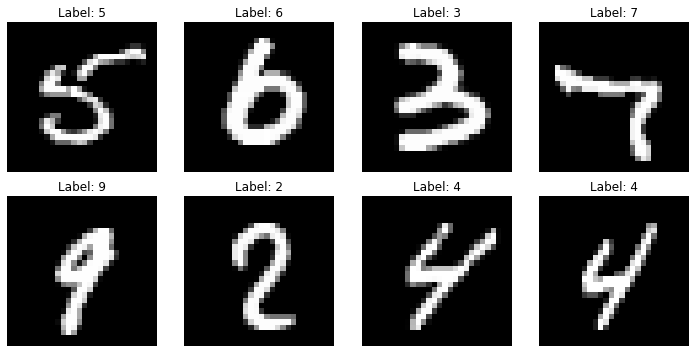

In [23]:
# Visualize the images
fig, axs = plt.subplots(2, 4, figsize=(10, 5))
axs = axs.flatten()

for i, (images, labels) in enumerate(data_loader):
    if i >= 8:
        break
    image = images[0].squeeze().numpy()  # Convert the tensor to a NumPy array
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(f"Label: {labels[0].item()}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [24]:
image, _ = dataset[0] #image sizes were printed to get and idea about the image sizes
image_size = image.shape

print("Image size:", image_size)

Image size: torch.Size([1, 28, 28])


# Assign the operations to GPU (Cuda)

In [25]:
#device = "cuda" 

In [26]:
#device

 # Define Generator and Discriminator Model Architecture

In [27]:
# Define the discriminator model
class Discriminator(nn.Module):
    def __init__(self, image_dim):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            nn.Conv2d(1, 28, kernel_size=4, stride=2, padding=1, bias=False),
            nn.LeakyReLU(0.2),

            nn.Conv2d(28, 56, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(56),
            nn.LeakyReLU(0.2),

            nn.Conv2d(56, 112, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(112),
            nn.LeakyReLU(0.2),
    
            
            nn.Conv2d(112, 1, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x)


class Generator(nn.Module):
    def __init__(self, latent_size):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            
            nn.ConvTranspose2d(latent_size, 256, kernel_size=3, stride=2, padding=0, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),


            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=0, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=0, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),       
            
            nn.ConvTranspose2d(64, 1, kernel_size=3, stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.gen(x)


In [28]:
lr = 0.0003# Define the learning rate
beta_1 = 0.5 #Adaptive Moment estimation parameters
beta_2 = 0.999
latent_size = 100 #Latent for image generator
image_dim = 28 * 28 * 1#Image dimensions for the nn
batch_size = 100 #Size of batches
num_epochs = 50 #No of epochs

# Loding the Discriminator and Generator with parameters

In [29]:
discriminator= Discriminator(image_dim).to(device)
generator = Generator(latent_size).to(device)

fixed_noise = torch.randn(batch_size, latent_size,1,1).to(device)



In [30]:
opt_disc = optim.Adam(discriminator.parameters(), lr=lr,betas=(beta_1, beta_2))#
opt_gen = optim.Adam(generator.parameters(), lr=lr,betas=(beta_1, beta_2))#
criterion = nn.BCELoss()


# Visualizing a noise added image for reference

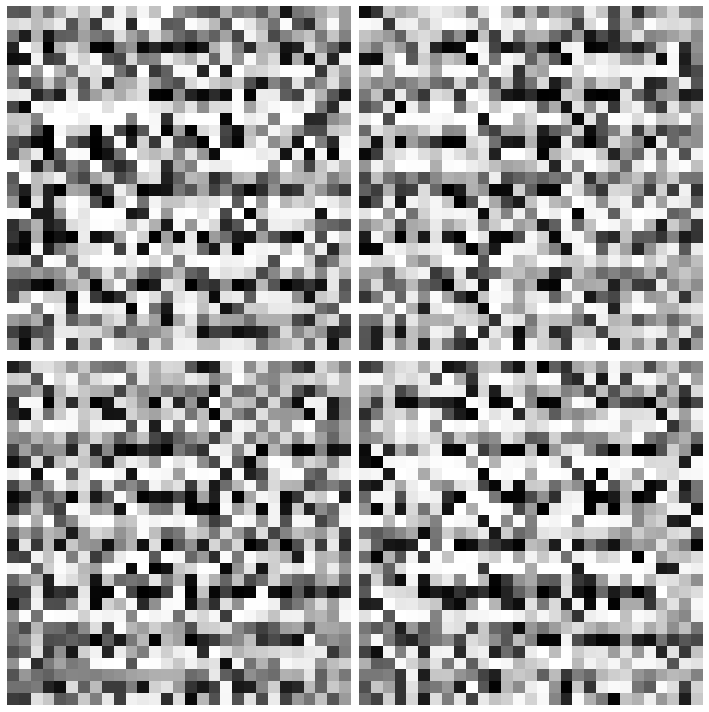

In [31]:

fake_images = generator(fixed_noise)# Convert fixed noise to image

# Reshape the fake images to (batch_size, channels, height, width)
#fake_images = fake_images.reshape(batch_size, 1, 28, 28)


fake_images = fake_images.cpu().detach().numpy()# Convert the tensor to a numpy array


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))# Plot the images
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(fake_images[i][0], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Training the Discriminator and Generator

Epoch [1/50] Batch 0/469                 Loss D: 0.6801, Loss G: 0.8410


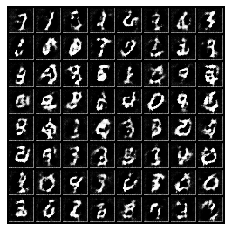

Epoch [2/50] Batch 0/469                 Loss D: 0.4291, Loss G: 2.3747


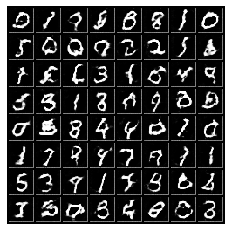

Epoch [3/50] Batch 0/469                 Loss D: 0.4457, Loss G: 2.1927


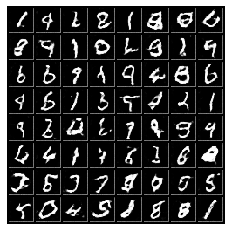

Epoch [4/50] Batch 0/469                 Loss D: 0.3782, Loss G: 1.2014


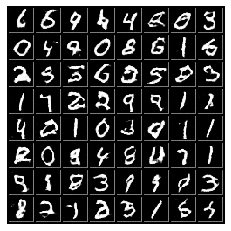

Epoch [5/50] Batch 0/469                 Loss D: 0.3624, Loss G: 1.1526


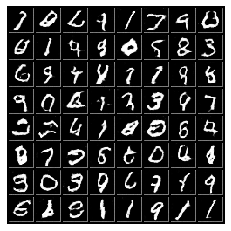

Epoch [6/50] Batch 0/469                 Loss D: 0.3467, Loss G: 1.5294


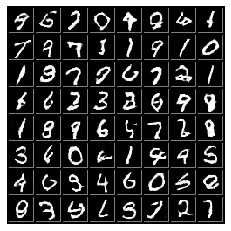

Epoch [7/50] Batch 0/469                 Loss D: 0.4774, Loss G: 0.8272


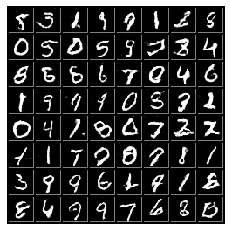

Epoch [8/50] Batch 0/469                 Loss D: 0.2764, Loss G: 2.5132


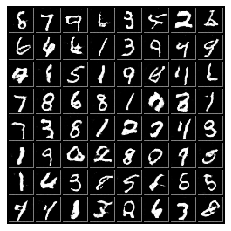

Epoch [9/50] Batch 0/469                 Loss D: 0.3901, Loss G: 0.9658


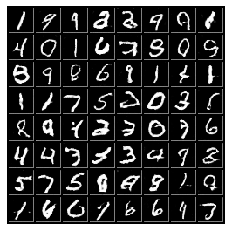

Epoch [10/50] Batch 0/469                 Loss D: 0.2774, Loss G: 2.2641


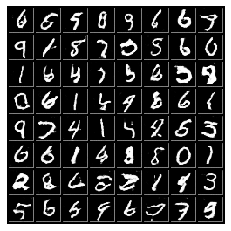

Epoch [11/50] Batch 0/469                 Loss D: 0.3200, Loss G: 1.8844


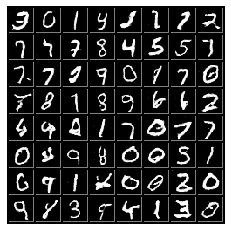

Epoch [12/50] Batch 0/469                 Loss D: 0.3951, Loss G: 1.9116


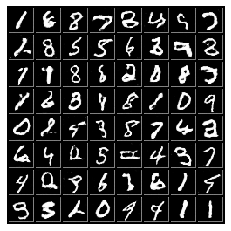

Epoch [13/50] Batch 0/469                 Loss D: 0.3935, Loss G: 0.6722


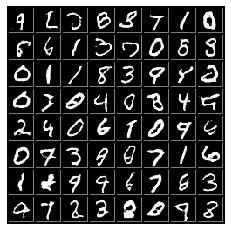

Epoch [14/50] Batch 0/469                 Loss D: 0.2695, Loss G: 2.0378


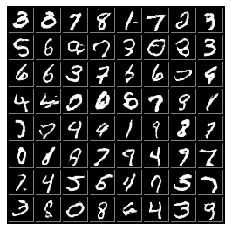

Epoch [15/50] Batch 0/469                 Loss D: 0.4156, Loss G: 2.3741


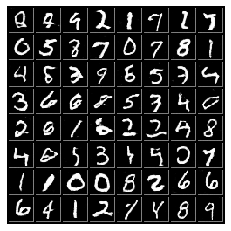

Epoch [16/50] Batch 0/469                 Loss D: 0.2525, Loss G: 2.2353


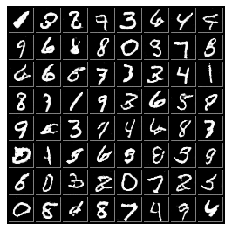

Epoch [17/50] Batch 0/469                 Loss D: 0.4250, Loss G: 3.3903


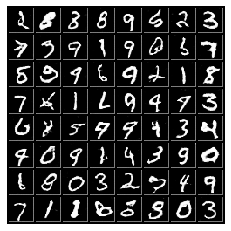

Epoch [18/50] Batch 0/469                 Loss D: 0.4377, Loss G: 1.6246


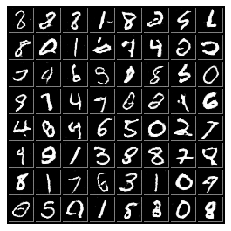

Epoch [19/50] Batch 0/469                 Loss D: 0.2841, Loss G: 2.7254


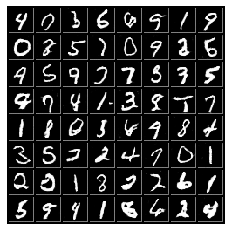

Epoch [20/50] Batch 0/469                 Loss D: 0.2364, Loss G: 1.9850


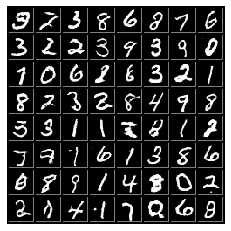

Epoch [21/50] Batch 0/469                 Loss D: 0.2535, Loss G: 2.0658


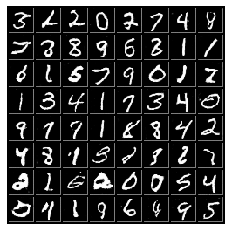

Epoch [22/50] Batch 0/469                 Loss D: 0.2542, Loss G: 1.9857


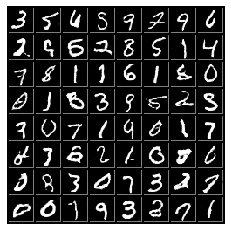

Epoch [23/50] Batch 0/469                 Loss D: 0.4649, Loss G: 0.9677


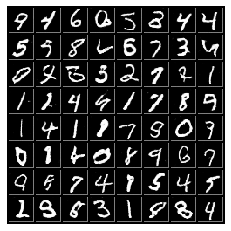

Epoch [24/50] Batch 0/469                 Loss D: 0.3378, Loss G: 1.2975


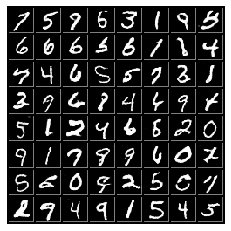

Epoch [25/50] Batch 0/469                 Loss D: 0.2977, Loss G: 3.1303


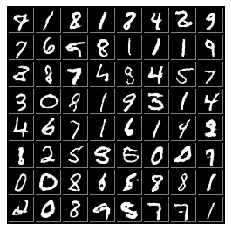

Epoch [26/50] Batch 0/469                 Loss D: 0.2899, Loss G: 2.3942


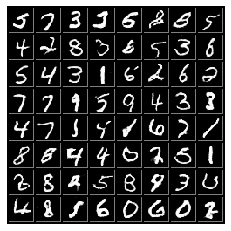

Epoch [27/50] Batch 0/469                 Loss D: 0.2787, Loss G: 2.3105


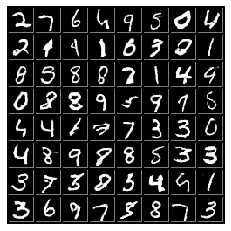

Epoch [28/50] Batch 0/469                 Loss D: 0.2947, Loss G: 2.0165


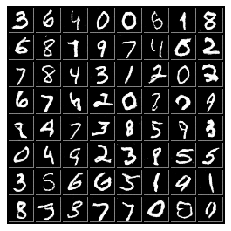

Epoch [29/50] Batch 0/469                 Loss D: 0.2204, Loss G: 2.9487


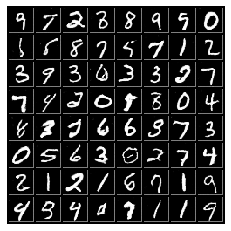

Epoch [30/50] Batch 0/469                 Loss D: 0.2548, Loss G: 2.9876


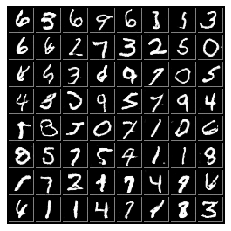

Epoch [31/50] Batch 0/469                 Loss D: 0.2296, Loss G: 1.8931


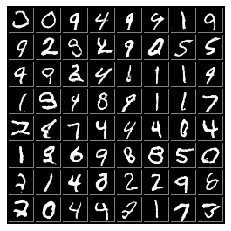

Epoch [32/50] Batch 0/469                 Loss D: 0.1951, Loss G: 2.7725


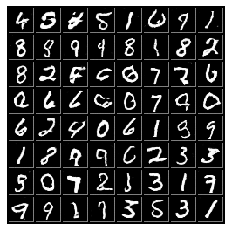

Epoch [33/50] Batch 0/469                 Loss D: 0.2659, Loss G: 2.1207


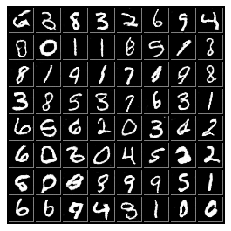

Epoch [34/50] Batch 0/469                 Loss D: 0.2540, Loss G: 1.7501


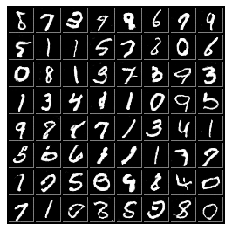

Epoch [35/50] Batch 0/469                 Loss D: 0.2596, Loss G: 2.3096


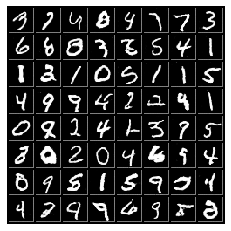

Epoch [36/50] Batch 0/469                 Loss D: 0.2518, Loss G: 1.4822


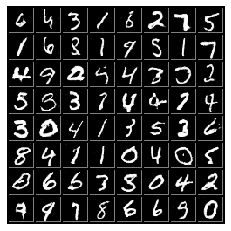

Epoch [37/50] Batch 0/469                 Loss D: 0.3179, Loss G: 2.4477


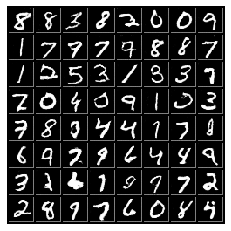

Epoch [38/50] Batch 0/469                 Loss D: 0.1681, Loss G: 2.4993


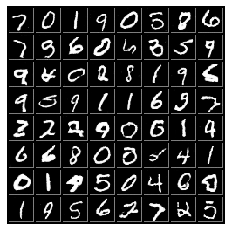

Epoch [39/50] Batch 0/469                 Loss D: 0.2308, Loss G: 2.8106


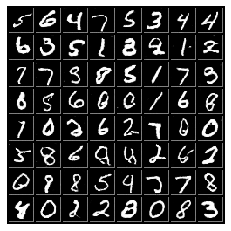

Epoch [40/50] Batch 0/469                 Loss D: 0.3527, Loss G: 1.6927


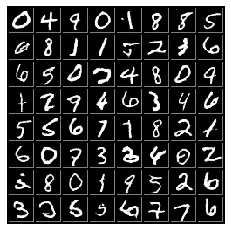

Epoch [41/50] Batch 0/469                 Loss D: 0.2639, Loss G: 3.6077


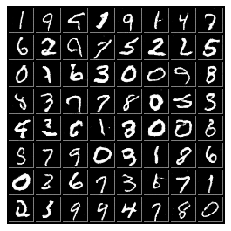

Epoch [42/50] Batch 0/469                 Loss D: 0.2608, Loss G: 1.5053


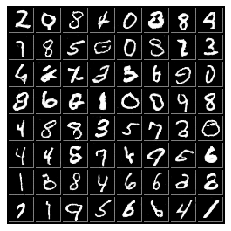

Epoch [43/50] Batch 0/469                 Loss D: 0.5276, Loss G: 2.6061


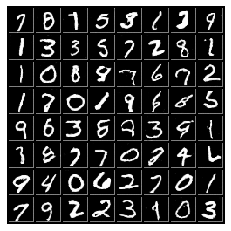

Epoch [44/50] Batch 0/469                 Loss D: 0.3004, Loss G: 3.2471


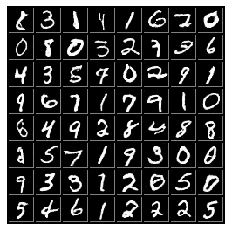

Epoch [45/50] Batch 0/469                 Loss D: 0.2577, Loss G: 1.1425


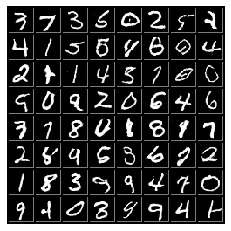

Epoch [46/50] Batch 0/469                 Loss D: 0.4142, Loss G: 1.4989


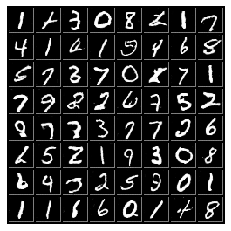

Epoch [47/50] Batch 0/469                 Loss D: 0.7287, Loss G: 4.2253


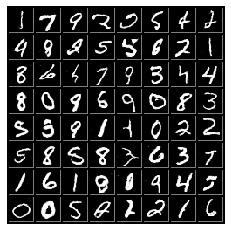

Epoch [48/50] Batch 0/469                 Loss D: 0.4377, Loss G: 1.6747


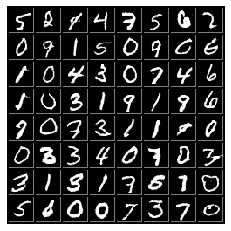

Epoch [49/50] Batch 0/469                 Loss D: 0.2573, Loss G: 1.7352


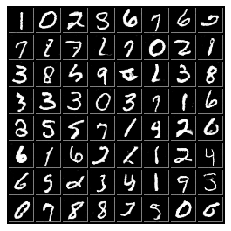

Epoch [50/50] Batch 0/469                 Loss D: 0.3316, Loss G: 3.3980


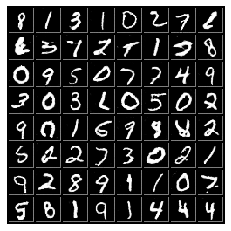

In [32]:
import torchvision.utils as vutils

# Training loop
for epoch in range(num_epochs):
    for batch_idx, (real, _) in enumerate(data_loader):
        real = real.to(device)
        batch_size = real.shape[0]

        # Train the Discriminator
        noise = torch.randn(batch_size, latent_size,1,1).to(device)
        fake = generator(noise)
        disc_real = discriminator(real).view(-1)
        lossD_real = criterion(disc_real, torch.ones_like(disc_real))
        disc_fake = discriminator(fake.detach()).view(-1)
        lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        lossD = (lossD_real + lossD_fake) / 2
        discriminator.zero_grad()
        lossD.backward(retain_graph=True)
        opt_disc.step()

        # Train the Generator
        output = discriminator(fake).view(-1)
        lossG = criterion(output, torch.ones_like(output))
        generator.zero_grad()
        lossG.backward()
        opt_gen.step()

        if batch_idx == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}] Batch {batch_idx}/{len(data_loader)} \
                Loss D: {lossD:.4f}, Loss G: {lossG:.4f}"
            )

    # Generate samples after each epoch
    with torch.no_grad():
        fixed_noise = torch.randn(64, latent_size, 1, 1).to(device)
        fake = generator(fixed_noise)
        fake_images = fake.cpu()
        img_grid_fake = torchvision.utils.make_grid(fake_images, nrow=8, normalize=True)
        plt.imshow(np.transpose(img_grid_fake, (1, 2, 0)).numpy())
        plt.axis('off')
        plt.show()



# Save the 100 generated images in 10*10 grid

In [ ]:
latent_size = 100

# Load generator model
generator_path = 'G.pkl'
with open(generator_path, 'rb') as f:
    generator_state = pickle.load(f)
    generator = Generator(latent_size=latent_size)
    generator.load_state_dict(generator_state['generator'])
    generator.eval()


# Number of images to generate
num_images = 100

# Random latent samples
latent_dim = latent_size
z = torch.randn(num_images, latent_dim).to(device)

# Generate fake images
fake_images = generator(z)

# Save generated images


save_image(fake_images_resized, '100_generated_images.png', nrow=10, normalize=True)# Save generated images


# Saving the model

In [ ]:

model_path = 'G.pkl'
model_path_disc='D.pkl'
model_state = {
    'generator': generator.state_dict(),
    'discriminator': discriminator.state_dict()
}
discriminator_state = discriminator.state_dict()
with open(model_path, 'wb') as f:
    pickle.dump(model_state, f)
with open(model_path_disc, 'wb') as f:
    pickle.dump(discriminator_state, f)

In [ ]:
with open(model_path, 'rb') as f:
    model_state = pickle.load(f)


# Saving Images and latent Samples

In [19]:
latent_size = 100
num_images_per_digit = 100
num_digits = 10
total_images = num_images_per_digit * num_digits

# Load the saved generator model
generator_path = 'dcgan_model_untitled9.pkl'
with open(generator_path, 'rb') as f:
    generator_state = pickle.load(f)
    generator = Generator(latent_size=latent_size)
    generator.load_state_dict(generator_state['generator'])
    generator = generator.to(device)  # Move the model to the same device as input
    generator.eval()

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create a folder for saving fake digits
save_folder = "Fake Digits num by num 2"
os.makedirs(save_folder, exist_ok=True)

# Generate and save fake images and latent samples for each digit
for digit in range(num_digits):
    # Random latent samples for the current digit
    z = torch.randn(num_images_per_digit, latent_size, 1, 1).to(device)

    # Generate fake images
    fake_images = generator(z)

    # Create a folder for the current digit
    digit_folder = os.path.join(save_folder, str(digit))
    os.makedirs(digit_folder, exist_ok=True)

    # Save generated images and latent samples for the current digit
    for i in range(num_images_per_digit):
        # Save fake image
        fake_image_path = os.path.join(digit_folder, f"fake_image_{i+1}.png")
        vutils.save_image(fake_images[i].detach().cpu(), fake_image_path, normalize=True)

        # Save latent sample as .txt file
        latent_sample_path = os.path.join(digit_folder, f"latent_sample_{i+1}.txt")
        np.savetxt(latent_sample_path, z[i].detach().cpu().numpy().reshape(-1))

print("Fake images and latent samples saved successfully.")


Fake images and latent samples saved successfully.


# Loading the CNN Classifier

In [44]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=36,  #16
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(36, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x    # return x for visualization



# Classification Error for S0

In [54]:
import torch
import torchvision
import torch.nn.functional as F
import pickle

# Load the saved CNN model
model_path = 'C.pkl'
with open(model_path, 'rb') as f:
    model = pickle.load(f)

# Load the S0 dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])
s0_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loader for the S0 dataset
batch_size = 100
s0_dataloader = torch.utils.data.DataLoader(s0_dataset, batch_size=batch_size, shuffle=True)

# Set the model in evaluation mode
model.eval()

# Track the number of misclassified samples
num_misclassified = 0

# Iterate over the S0 dataset and compute the classification error
with torch.no_grad():
    for images, labels in s0_dataloader:
        # Forward pass
        outputs, _ = model(images)

        # Get predicted labels
        _, predicted = torch.max(outputs.data, 1)

        # Count the number of misclassified samples
        num_misclassified += (predicted != labels).sum().item()

# Calculate the classification error
classification_error = num_misclassified / len(s0_dataset)

print(f"S0 Classification Error: {classification_error * 100}%")


S0 Classification Error: 84.14%


# Classification Error for S1

In [52]:
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import pickle
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = [file for file in os.listdir(self.root_dir) if file.endswith('.png')]

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.file_list[index])
        image = Image.open(img_path).convert('L')

        if self.transform:
            image = self.transform(image)

        return image

# Load the saved classifier model
model_path = 'C.pkl'
with open(model_path, 'rb') as f:
    model = pickle.load(f)

# Load the S1 dataset
dataset_path = 'S1'
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = CustomDataset(dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Evaluate the classification error
correct = 0
total = 0
with torch.no_grad():
    for images in dataloader:
        outputs, _ = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += images.size(0)
        correct += predicted.eq(1).sum().item()

classification_error = 100 * (1 - correct / total)
print(f"Classification Error: {classification_error:.2f}%")


Classification Error: 100.00%
